In [2]:
!pip install torch transformers datasets scikit-learn numpy matplotlib tqdm seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.2.1-cp310-cp310-manylinux1_x86_64.whl (755.5 MB)


You should consider upgrading via the '/opt/itu/easybuild/software/Python/3.10.4-GCCcore-11.3.0/bin/python -m pip install --upgrade pip' command.


In [172]:
import torch
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel
from datasets import Dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import numpy as np
import matplotlib.pyplot as plt
from load_data import load_google_data
import sys
from tqdm import tqdm
from PIL import Image
import copy

In [5]:
climate_zone_descriptions = {
    "Af": "Tropical rainforest climate",
    "Am": "Tropical monsoon climate",
    "Aw": "Tropical savanna climate (wet-dry)",
    "BWh": "Hot desert climate",
    "BWk": "Cold desert climate",
    "BSh": "Hot semi-arid climate",
    "BSk": "Cold semi-arid climate",
    "Csa": "Hot-summer Mediterranean climate",
    "Csb": "Warm-summer Mediterranean climate",
    "Csc": "Cold-summer Mediterranean climate",
    "Cwa": "Monsoon-influenced humid subtropical climate",
    "Cwb": "Subtropical highland climate with dry winters",
    "Cwc": "Cold subtropical highland climate with dry winters",
    "Cfa": "Humid subtropical climate",
    "Cfb": "Oceanic climate",
    "Cfc": "Subpolar oceanic climate",
    "Dsa": "Hot-summer Mediterranean continental climate",
    "Dsb": "Warm-summer Mediterranean continental climate",
    "Dsc": "Cold-summer Mediterranean continental climate",
    "Dsd": "Cold-summer Mediterranean continental climate with extremely cold winters",
    "Dwa": "Monsoon-influenced hot-summer humid continental climate",
    "Dwb": "Monsoon-influenced warm-summer humid continental climate",
    "Dwc": "Monsoon-influenced subarctic climate",
    "Dwd": "Monsoon-influenced subarctic climate with extremely cold winters",
    "Dfa": "Hot-summer humid continental climate",
    "Dfb": "Warm-summer humid continental climate",
    "Dfc": "Subarctic climate with cool summers",
    "Dfd": "Subarctic climate with extremely cold winters",
    "ET": "Tundra climate",
    "EF": "Ice cap climate"
}

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [6]:
labels = [f"This image was taken in {c}" for c in climate_zone_descriptions.values()]

In [7]:
def classify_image(image_path, model_path):
    # Load the model
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    # Load the image and preprocess it
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    image = Image.open(image_path)
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted label
    logits_per_image = outputs.logits_per_image
    predicted_label = logits_per_image.argmax().item()

    
    print(f"Correct answer: {example['Climate Zone']}")
    print(f"Model Answer: {countries[predicted_label]}")
    return predicted_label, logits_per_image, outputs

In [ ]:
image_path = "/home/data_shares/geocv/more_google_images/google_28615_180.jpg"  # Update with the path to your image
model_path = "Countryclip_1e-06_128_3.pth"  # Update with your model path
predicted_label, logits_per_image, outputs = classify_image(image_path, model_path)
print("Predicted Label Index:", predicted_label)

In [8]:
import pandas as pd

In [167]:
dataset = load_google_data()

Loading dataset from disk:   0%|          | 0/27 [02:00<?, ?it/s]

In [10]:
countries = list(pd.Series(dataset["train"]["Country"]).unique())

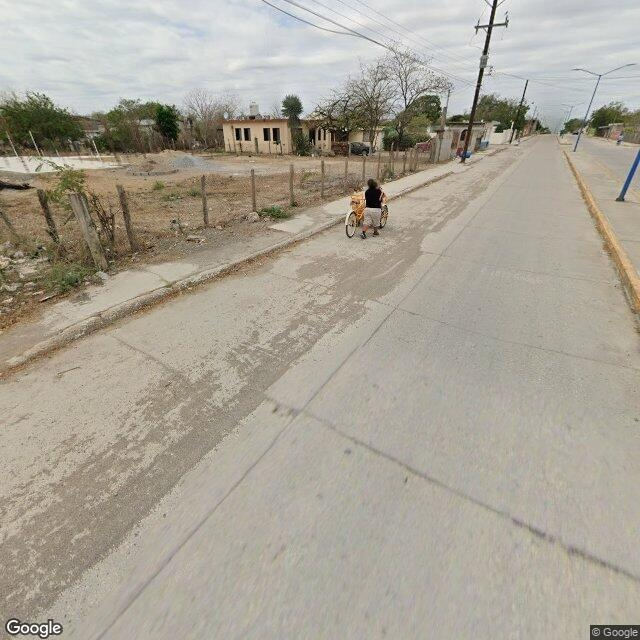

In [11]:
dataset["validation"][5000]["image"]

In [109]:
def classify_image_country(example, path):
    # Load the model
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    model.load_state_dict(torch.load(path))
    model.eval()

    # Load the image and preprocess it
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    image = example["image"]
    inputs = processor(text=countries, images=image, return_tensors="pt", padding=True)
#     texts = ["A photo of a road with a single yellow roadline in the center of the road", "A photo of a road with a double yellow roadline in the center of the road", "A photo of a road with a single yellow roadline on the sides of the road", "A photo of a road with only white roadlines", "A photo that does not show a road"]
#     texts = ["A photo of a street with vehicles", "A photo of an empty street with no vehicles"]
#     inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted label
    logits_per_image = outputs.logits_per_image
    predicted_label = logits_per_image.argmax().item()
    
    print(f"Correct answer: {example['Country']}")
    print(f"Model Answer: {countries[predicted_label]}")
#     print(f"Model Answer: {texts[predicted_label]}")
    return predicted_label

In [110]:
def classify_image_climate(example, path):
    # Load the model
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    model.load_state_dict(torch.load(path))
    model.eval()

    # Load the image and preprocess it
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    image = example["image"]
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted label
    logits_per_image = outputs.logits_per_image
    predicted_label = logits_per_image.argmax().item()
    
    print(f"Correct answer: {climate_zone_descriptions[example['Climate Zone']]}")
    print(f"Model Answer: {labels[predicted_label]}")
    return predicted_label

In [14]:
label_index = [c for c in climate_zone_descriptions.keys()]

In [53]:
for p, value in enumerate(dataset["validation"]["Country"]):
    if value == "American Samoa":
        print(p)

10600
10601
10605
10606
10607
10608
18767
18768
18869
18951
19040
19041
20057
20058
20060
20061
20062
20063
20064
20065
20066
20067
20072
20073
20074
20075
20076
20077
20078


Correct answer: Netherlands
Model Answer: Poland
Correct answer: Oceanic climate
Model Answer: This image was taken in Oceanic climate


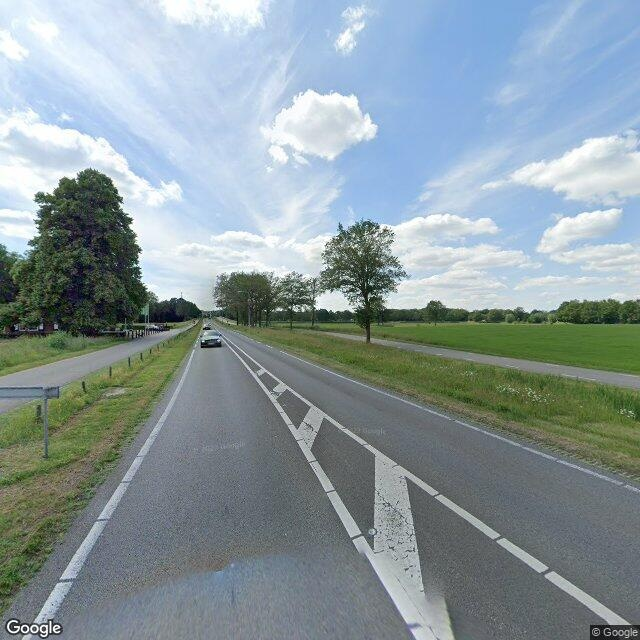

In [178]:
climate_model = "Climate_Zoneclip_1_7479378934630898e-06_16_2.pth"
country_model = "Countryclip_1e-06_128_3.pth"


index = 5200
classify_image_country(dataset["validation"][index], country_model)
classify_image_climate(dataset["validation"][index], climate_model)
dataset["validation"][index]["image"]

In [188]:
def evaluate_model_country(dataset, model_path, batch_size=32):
    # Load the model
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize lists to store true labels and predicted labels
    true_labels = []
    predicted_labels = []

    # Initialize CLIP processor
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    countries = list(pd.Series(dataset["Country"]).unique())
#     labels = [f"This image was taken in {c}" for c in countries]
    # Iterate over the dataset in batches
    data = copy.deepcopy(dataset)
    data.set_format(type='torch', columns=['image', 'Climate Zone', 'Country'])
    dataloader = DataLoader(data, batch_size=batch_size)
    for batch in tqdm(dataloader, desc="Evaluating:.."):
        images = batch["image"]

        # Preprocess images
        inputs = processor(text=countries, images=images, return_tensors="pt", padding=True)

        # Move inputs to GPU if available
        for k, v in inputs.items():
            inputs[k] = v.to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(**inputs)

        # Get predicted labels
        logits_per_image = outputs.logits_per_image
        predicted_labels.extend([countries[i.argmax().item()] for i in logits_per_image])

        # Store true labels
        true_labels.extend(batch["Country"])
    

    return true_labels, predicted_labels


In [189]:
# Load the validation dataset
# preprocessed_climate_dataset, preprocessed_country_dataset = load_and_preprocess_data()

# country_loader = prepare_dataloader(preprocessed_country_dataset)

# Specify the path to the model
# model_path = "Countryclip_1e-06_128_3.pth"
model_path = "Climate_Zoneclip_1_7479378934630898e-06_16_2.pth"

# Evaluate the model
true_labels, predicted_labels = evaluate_model_country(dataset["validation"], model_path)

# print(f1_score(true_labels, predicted_labels, average='samples'))


Evaluating:..: 100%|██████████| 711/711 [06:28<00:00,  1.83it/s]


In [190]:
def calculate_accuracy(true_labels, predicted_labels):
    """
    Calculates the accuracy of a classifier given the true labels and predicted labels.

    Args:
    true_labels (list): List of true labels.
    predicted_labels (list): List of predicted labels.

    Returns:
    float: Accuracy of the classifier.
    """
    correct = 0
    total = len(true_labels)
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label == predicted_label:
            correct += 1
    accuracy = correct / total
    return accuracy


In [191]:
accuracy = calculate_accuracy(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.3156667839549613


In [192]:
confusion_matrix_country = confusion_matrix(true_labels, predicted_labels)
# Compute F1 scores
print(f1_score(true_labels, predicted_labels, average='micro'))
print(f1_score(true_labels, predicted_labels, average='macro'))
print(f1_score(true_labels, predicted_labels, average='weighted'))

0.3156667839549613
0.17571689071351437
0.33946493427282687


In [193]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

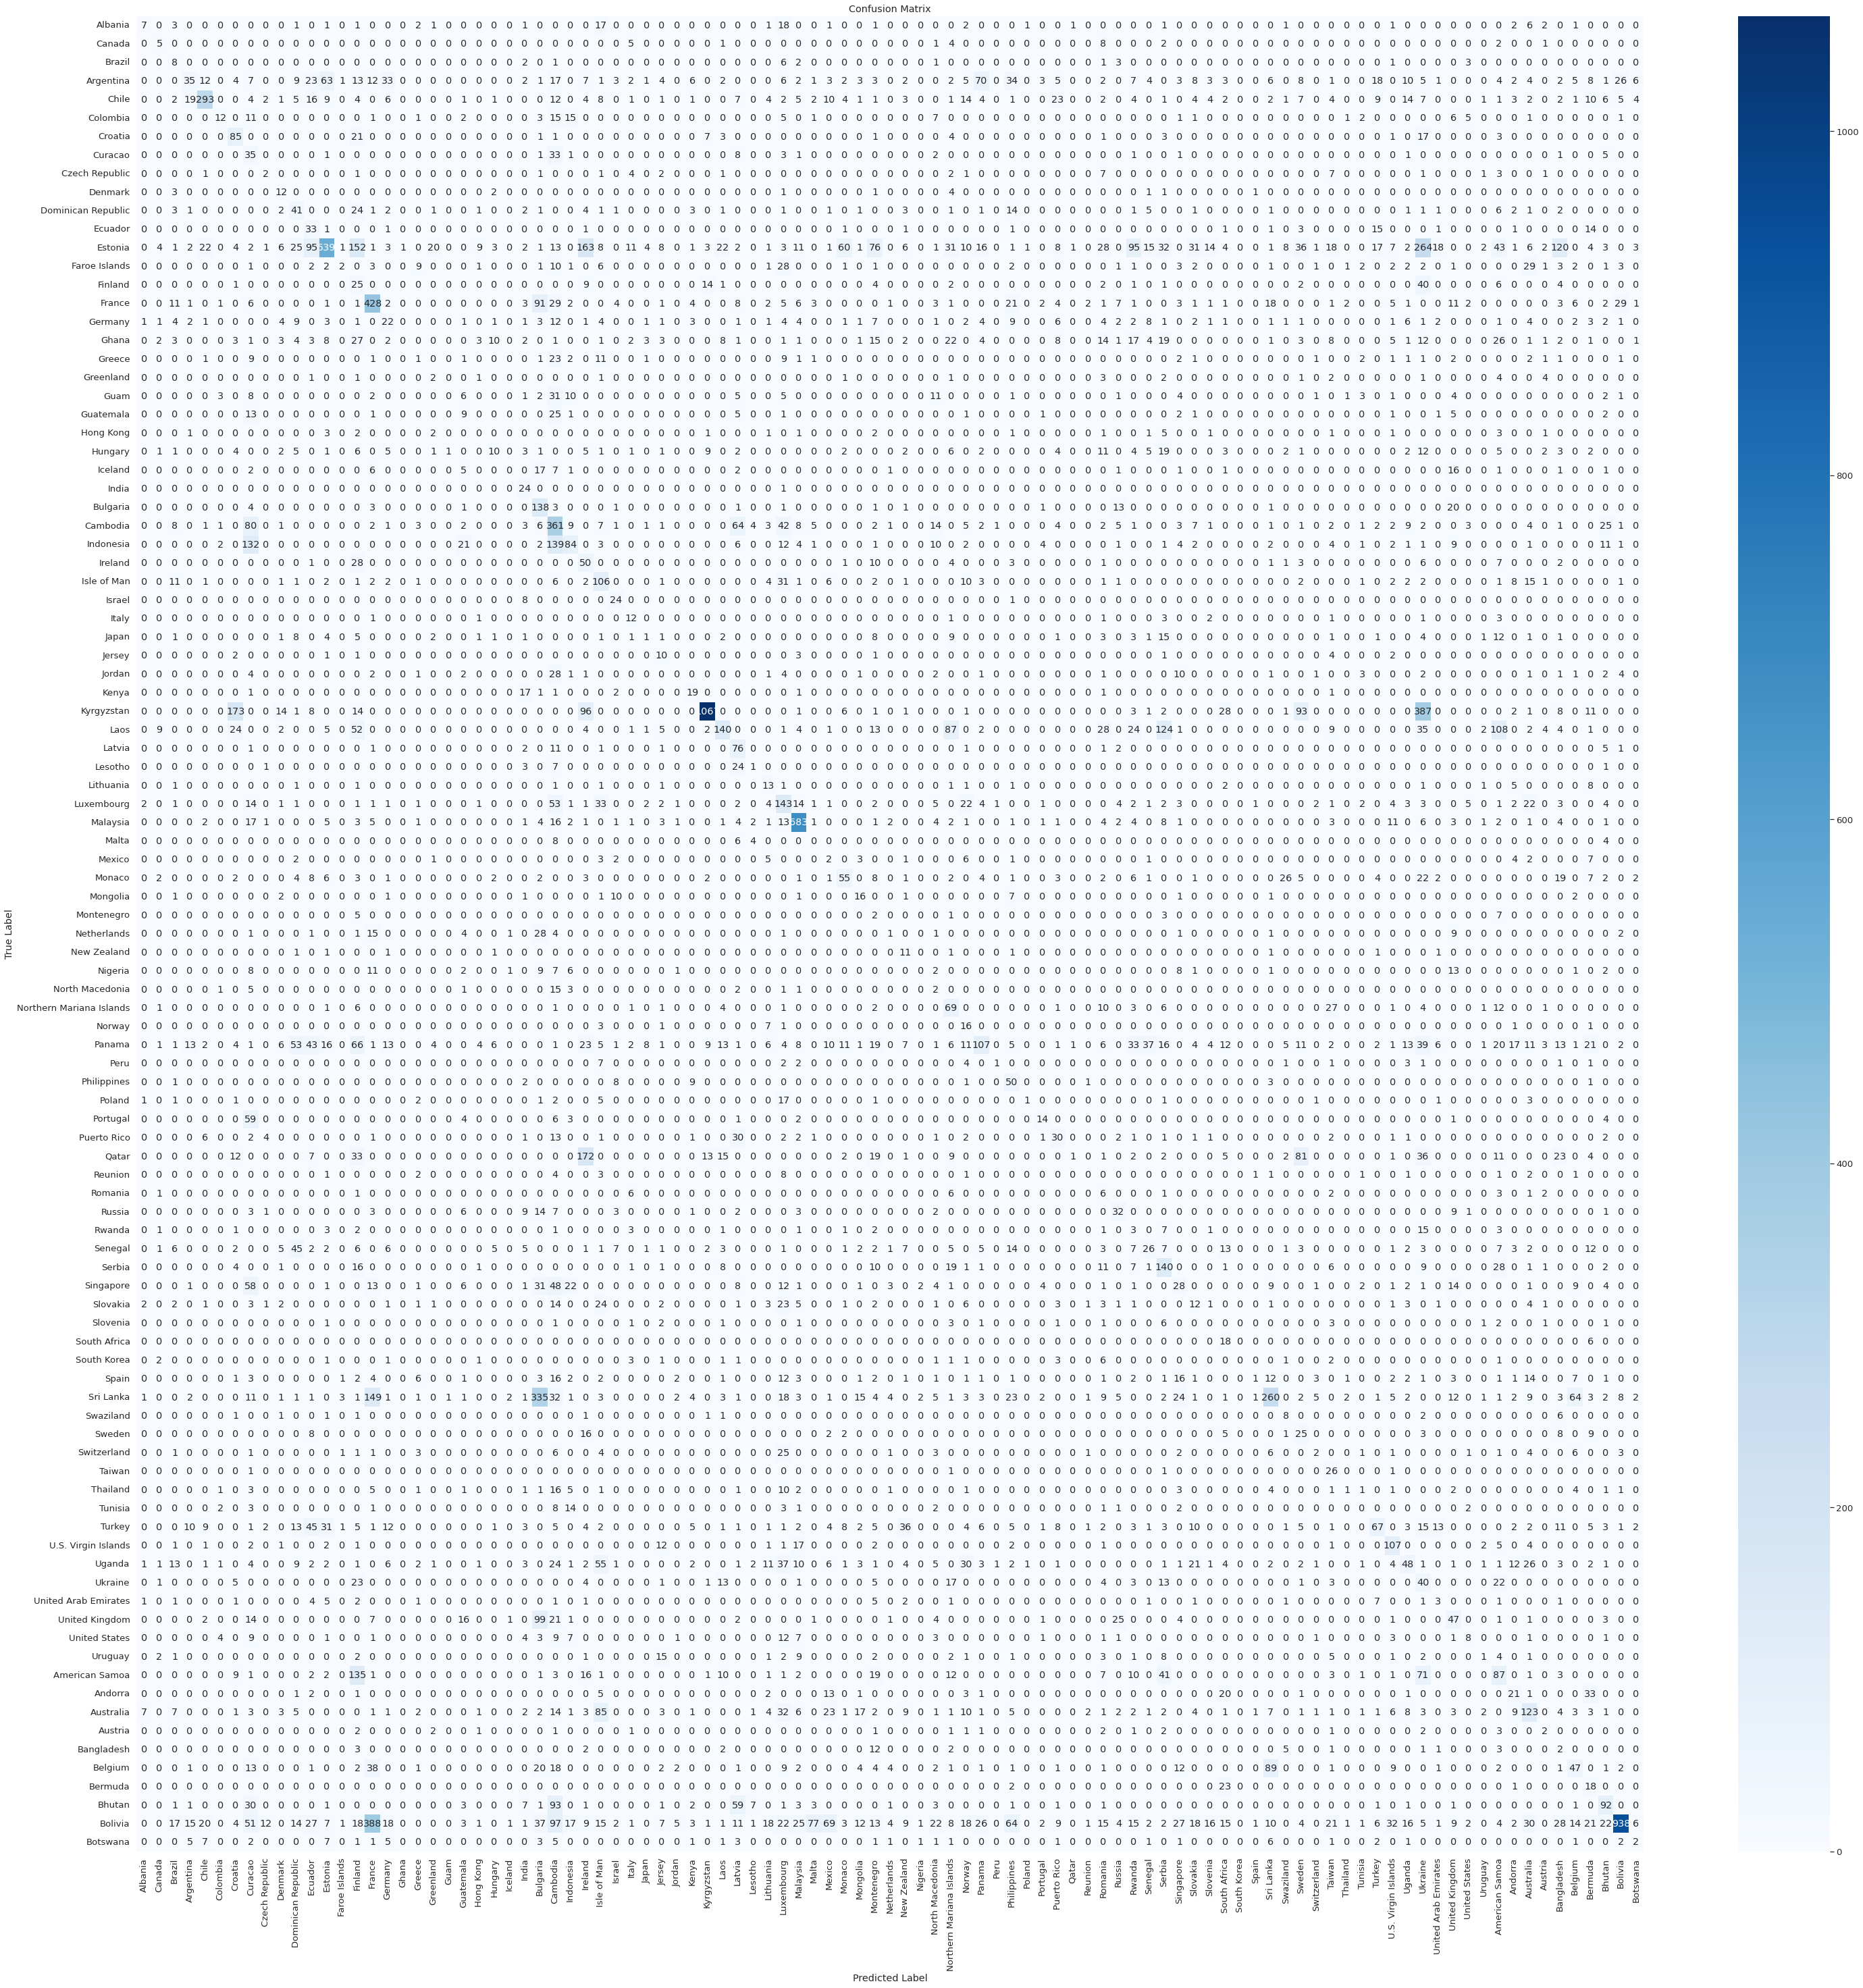

In [194]:
plt.figure(figsize=(50, 50))

sns.set_theme(font_scale=1.2)
sns.heatmap(confusion_matrix_country, annot=True, cmap="Blues", fmt="d", xticklabels=countries, yticklabels=countries)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")